In [1]:
%run C:/Users/HSS/dd.py

In [2]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

df = pd.read_csv(url, sep = '\s+', header = None, names = ['column_index','column_name'])
feature_name = df.iloc[:,1].values.tolist()
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [3]:
x_train = pd.read_csv('X_train.txt', sep = '\s+', header = None)
x_test = pd.read_csv('X_test.txt', sep = '\s+', header = None)
x_train.shape
x_train.columns = feature_name
x_test.columns = feature_name

In [4]:
y_train = pd.read_csv('y_train.txt', sep = '\s+', header = None, names = ['action'])
y_test = pd.read_csv('y_test.txt', sep = '\s+', header = None, names = ['action'])

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [7]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components = n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

HAR_pca, pca = get_pca_data(x_train, n_components = 2)

In [13]:
cols = ['pca_'+ str(n) for n in range(pca.components_.shape[0])]
cols

def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+ str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns = cols)

In [14]:
HAR_pca, pca = get_pca_data(x_train, n_components = 2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,action
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


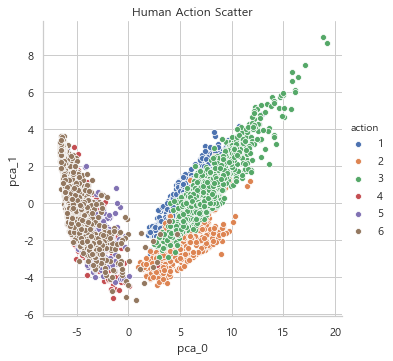

In [17]:
sns.pairplot(HAR_pd_pca, hue = 'action', height = 5, x_vars = ['pca_0'], y_vars = ['pca_1'])
plt.title('Human Action Scatter')
plt.show()

In [19]:
print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))
print('variance ratio: ', pca.explained_variance_ratio_)

sum of variance_ratio:  0.6746746270487947
variance ratio:  [0.6255444  0.04913023]


In [21]:
#3개일 때
HAR_pca, pca = get_pca_data(x_train, n_components = 3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))
print('variance ratio: ', pca.explained_variance_ratio_)

sum of variance_ratio:  0.7158893015785935
variance ratio:  [0.6255444  0.04913023 0.04121467]


In [22]:
#10개일 때
HAR_pca, pca = get_pca_data(x_train, n_components = 10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))
print('variance ratio: ', pca.explained_variance_ratio_)

sum of variance_ratio:  0.8050386452645438
variance ratio:  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068972 0.0096938  0.00858012]


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,120],
    'min_samples_leaf': [8,12],
    'min_samples_split' : [8,12]
        
}

rf_clf = RandomForestClassifier(random_state = 13, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=13,
                                    

In [25]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators','param_max_depth']
cv_result_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
1,1,0.836915,100,6
4,1,0.836915,100,6
17,3,0.836779,120,8
14,3,0.836779,120,8
16,5,0.836371,100,8


In [27]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 6,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.8369151251360174)

### MNIST

In [30]:
x_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train['label'])
x_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

KeyboardInterrupt: 

In [ ]:
import random
samples = random.choices(population = range(0,600000), k=16)
samples

In [ ]:
plt.figure(figsize = (14,12))

for idx ,n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(x_train[n].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
    plt.title(y_train[n])
    
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborClassifier
import time

start = time.time()
clf = KNeighborClassifier(n_neighbors = 5)
clf.fit(x_train, y_train)
print('Fit time: ', time.time() - start)

In [ ]:
from sklearn.metrics import accuracy_score

start = time.time()
pred = clf.predict(x_test)
print('Fit time: ', time.time() - start)
print(accuracy_score(y_test, pred))

### KNN은 차원의 저주에 취약하다
- PCA로 저주를 풀어주자

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca',PCA()),
    ('clf',KNeighborClassifier())
])

parameters = {
    'pca__n_components' : [2,5,10],
    'clf_n_neighbors' : [5,10,15]
}

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs = -1, verbose = 1)
grid.fit(x_train, y_train)



In [ ]:
print('Best score : {}'.format(grid.best_score_))
print('Best parameter set:')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.key()):
    print("{}: {}".format(param_name ,best_parameters[param_name]))

In [ ]:
accuracy_score(y_test, grid.best_estimator_.predict(x_testn))

In [ ]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    
results(grid.predict(x_train), y_train)

### Dogs and cats

In [31]:
import os

In [34]:
!pip install pillow

You are using pip version 18.0, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
!pip install scikit-image

You are using pip version 18.0, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
path = "./train/train/"
full_names = os.listdir(path)

#### 파일명에서 label 추출하기

In [39]:
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

#### 분포 확인하기

In [42]:
from collections import Counter

print(Counter(labels).keys())
print(Counter(labels).values())

dict_keys(['cat', 'dog'])
dict_values([12500, 12500])


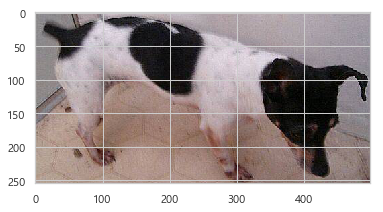

In [47]:
import random
import matplotlib.image as mpimg

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.grid(axis = True)
plt.show()

#### 이미지 크기 통일

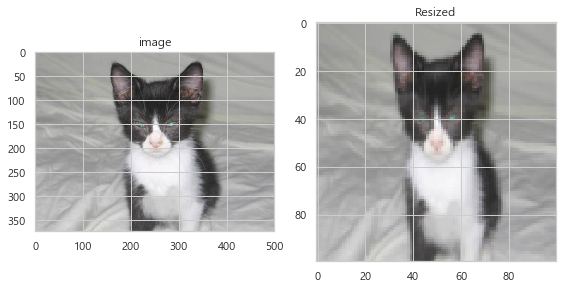

In [54]:
from skimage.transform import resize
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
resized = resize(image, (100,100,3))

fig, axes = plt.subplots(1,2,figsize = (8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title('image')
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title('Resized')

fig.tight_layout()
plt.show()

In [60]:
images = []
for file in full_names:
    image = mpimg.imread(path + sample)
    resized = resize(image, (100,100,3))
    images.append(resized.reshape(100*100*3,))
images = np.array(images)

MemoryError: 

In [ ]:
images.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_